In [3]:
!pip install tensorflow
print("Installed tensorflow")
import tensflow as tf

Installed tensorflow


ModuleNotFoundError: No module named 'tensflow'

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [10]:
(xtrain , ytrain) , (xtest , ytest) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [11]:
len(xtrain)

60000

In [12]:
len(xtest)

10000

In [14]:
xtrain[0].shape

(28, 28)

In [15]:
xtest[0].shape

(28, 28)

5
0
4
1
9


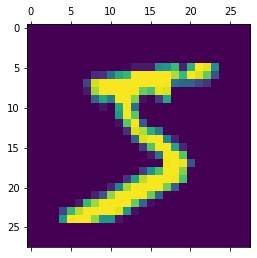

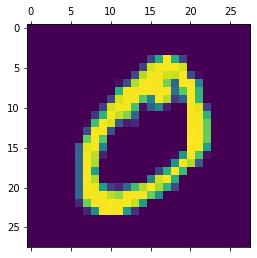

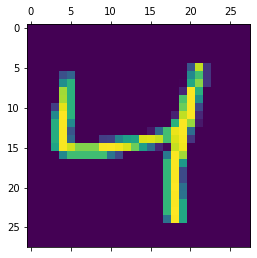

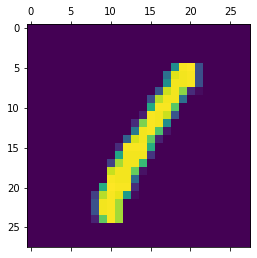

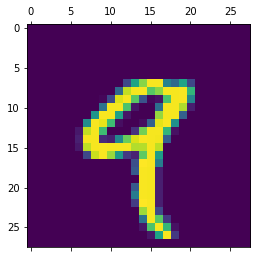

In [18]:
for i in range(5):
    plt.matshow(xtrain[i])
    print(ytrain[i])

7
2
1
0
4


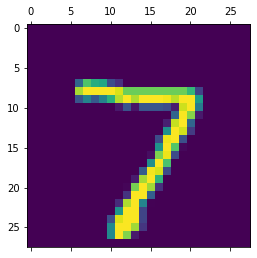

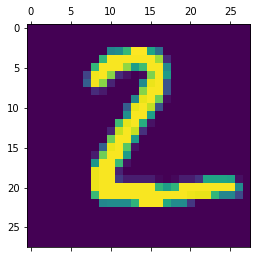

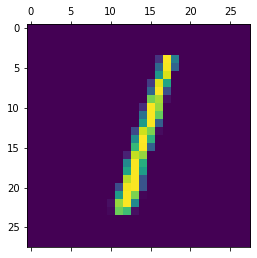

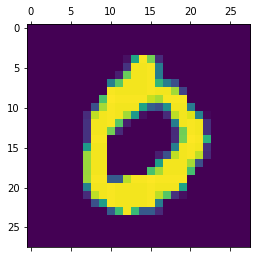

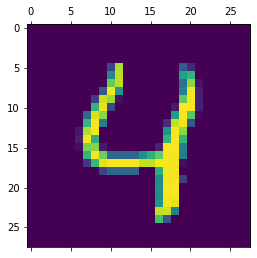

In [20]:
for i in range(5):
    plt.matshow(xtest[i])
    print(ytest[i])

In [32]:
xtrain = xtrain /255
xtest = xtest /255

In [33]:
xtrain_flatten = xtrain.reshape(len(xtrain) , 28*28)
xtrain_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
xtest_flatten = xtest.reshape(len(xtest) , 28*28)
xtest_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
#simple nueral network
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(xtrain_flatten , ytrain , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4689 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9251


In [36]:
model.evaluate(xtest_flatten , ytest )

313/313 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.9253


[0.2672954499721527, 0.9253000020980835]

In [40]:
y_pred = model.predict(xtest_flatten)
y_pred[0]

array([2.14430988e-02, 2.97021927e-07, 3.87503207e-02, 9.53341007e-01,
       1.13767385e-03, 1.01146966e-01, 1.32234334e-06, 9.99775648e-01,
       8.57797861e-02, 6.46971703e-01], dtype=float32)

In [49]:
y_pred_labels =[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [41]:
max(y_pred[0])

0.99977565

In [50]:
# for i in range(5):
#     print(np.argmax(y_pred[i]))

In [52]:
cm = tf.math.confusion_matrix(labels = ytest , predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,    9,  905,   23,    8,    4,   13,   11,   47,    4],
       [   3,    0,   11,  930,    0,   20,    3,   11,   24,    8],
       [   1,    1,    4,    2,  901,    0,   11,    4,    9,   49],
       [   9,    3,    2,   37,    7,  776,   14,    5,   33,    6],
       [   9,    3,    4,    2,    7,   12,  916,    2,    3,    0],
       [   2,    6,   20,    7,    3,    0,    0,  950,    3,   37],
       [   7,    9,    6,   24,    9,   24,    8,   11,  868,    8],
       [  11,    7,    1,   10,   15,    7,    0,   21,    5,  932]])>

In [54]:
!pip install seaborn

Text(69.0, 0.5, 'Truth')

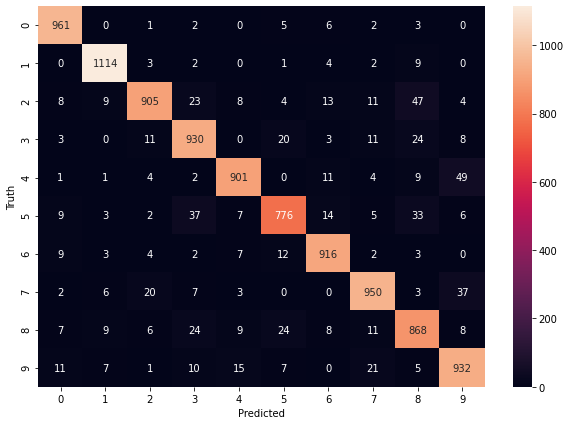

In [57]:
import seaborn as sn
plt.figure(figsize  = (10,7))
sn.heatmap(cm , annot = True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
#implementing with hidden layer
#simple nueral network
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(xtrain_flatten , ytrain , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2780 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1247 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9830


In [60]:
model.evaluate(xtest_flatten , ytest )

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9750


[0.08296908438205719, 0.9750000238418579]

In [61]:
y_pred = model.predict(xtest_flatten)
y_pred[0]

array([1.7673284e-02, 1.6331673e-04, 3.0608803e-01, 9.5284152e-01,
       2.6610162e-06, 6.2624514e-03, 4.6283395e-07, 9.9999082e-01,
       5.0624222e-02, 3.8206372e-01], dtype=float32)

In [62]:
y_pred_labels =[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [63]:
cm = tf.math.confusion_matrix(labels = ytest , predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    0,    1,    1,    0,    3,    2,    3,    0],
       [   0, 1127,    2,    0,    0,    2,    2,    0,    2,    0],
       [   5,    2, 1003,    5,    0,    0,    4,    5,    8,    0],
       [   0,    0,    2,  991,    0,    9,    0,    4,    3,    1],
       [   1,    0,    2,    0,  961,    0,    8,    4,    1,    5],
       [   3,    0,    0,   11,    1,  866,    5,    3,    3,    0],
       [   2,    3,    0,    1,    1,    5,  942,    0,    4,    0],
       [   0,    6,    9,    2,    0,    0,    0, 1008,    1,    2],
       [   4,    1,    2,    6,    4,   10,    1,    2,  943,    1],
       [   4,    7,    0,   10,   16,    9,    1,   15,    7,  940]])>

Text(69.0, 0.5, 'Truth')

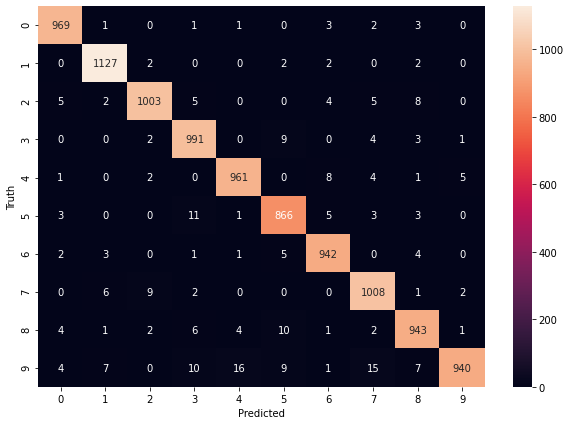

In [64]:
plt.figure(figsize  = (10,7))
sn.heatmap(cm , annot = True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')